In [31]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import mne
import glob
import os

Extracting EDF parameters from /Users/muhanxu/Desktop/RSIcode/edf_files/S002R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/muhanxu/Desktop/RSIcode/edf_files/S002R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/muhanxu/Desktop/RSIcode/edf_files/S002R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /Users/muhanxu/Desktop/RSIcode/edf_files/S001R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/muhanxu/Desktop/RSIcode/edf_files/S003R03.edf...
EDF file 

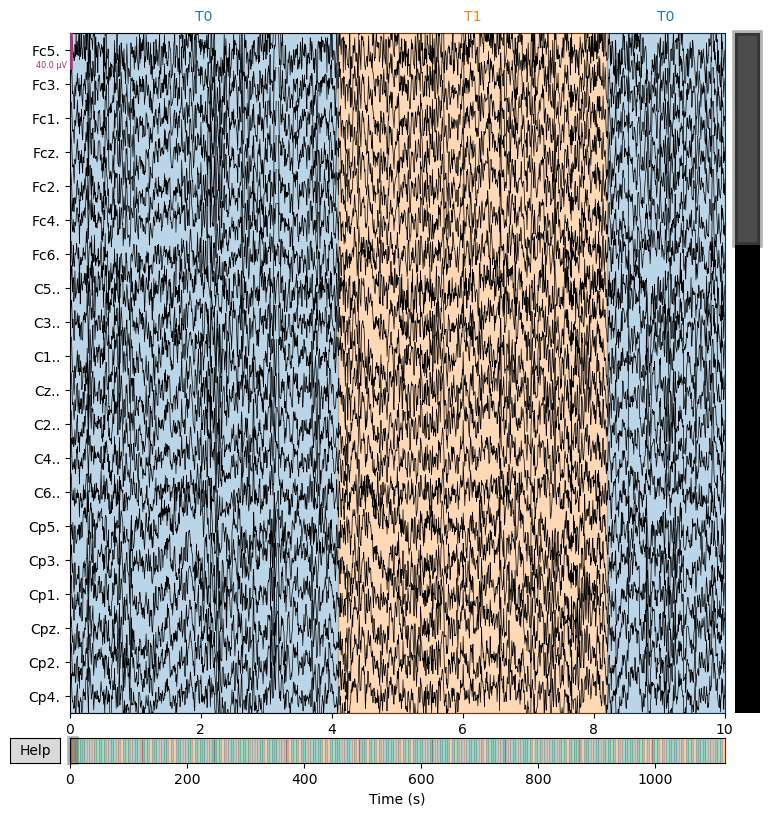

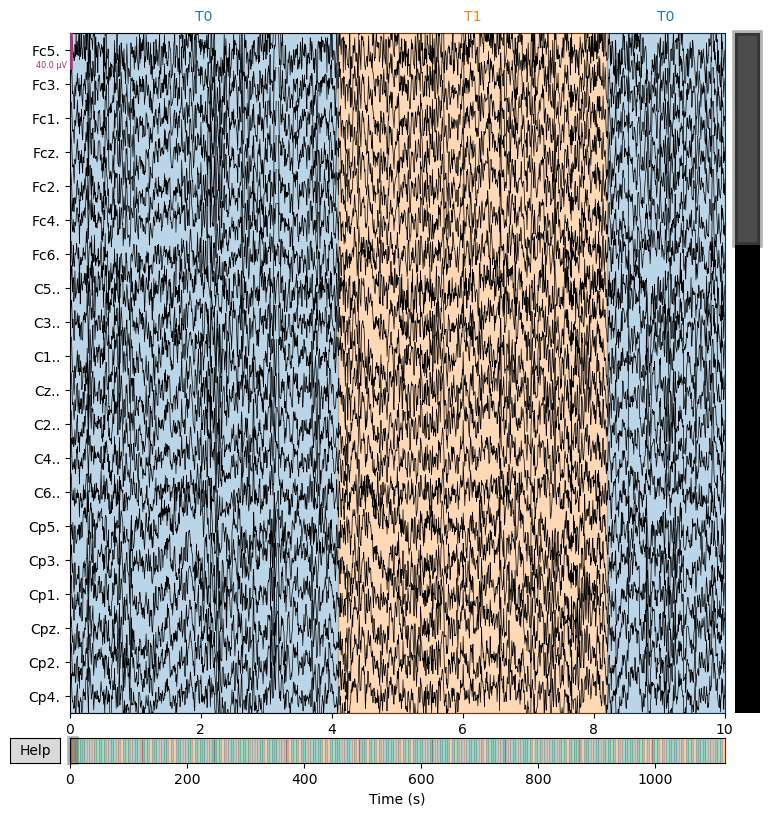

In [2]:
# Specify the directory containing your EDF files
edf_directory = "/Users/muhanxu/Desktop/RSIcode/edf_files"

# Use glob to find all EDF files in the directory
edf_files = glob.glob(os.path.join(edf_directory, "*.edf"))

# Initialize an empty list to hold the raw data from each file
raw_list = []

# Loop through the EDF files and load them
for edf_file in edf_files:
    raw = mne.io.read_raw_edf(edf_file, preload=True)
    raw_list.append(raw)
    
# Concatenate all raw data
raw_c = mne.concatenate_raws(raw_list)

print(raw_c.info)
raw_c.plot()

Filtering raw data in 9 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 529 samples (3.306 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


<Info | 8 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 1.0 Hz
 lowpass: 40.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: 3 items (dict)
>


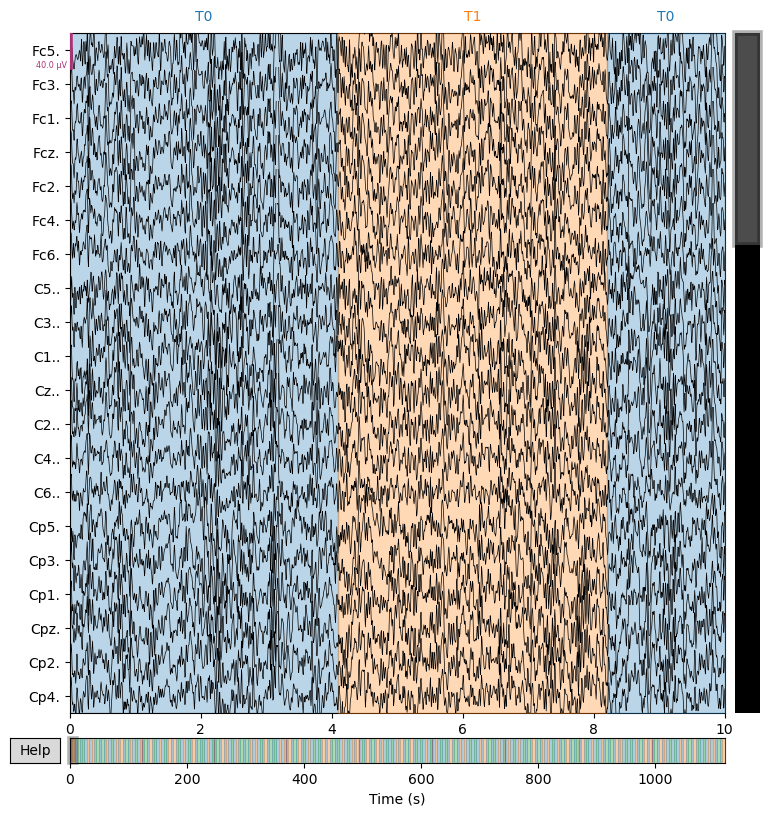

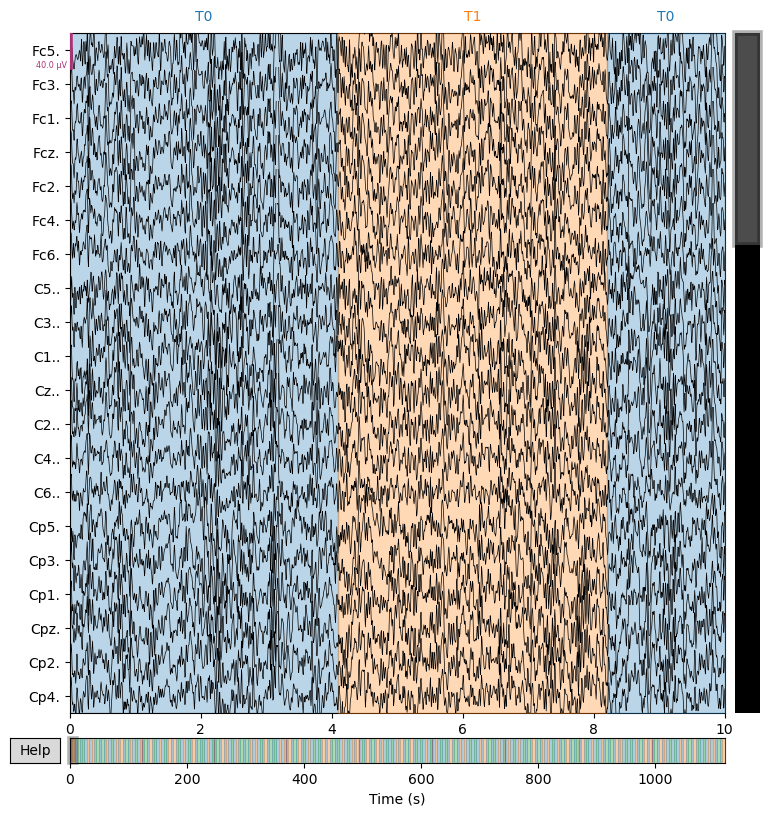

In [3]:
# Apply bandpass filter to retain frequencies between 13 Hz and 30 Hz
raw_filtered = raw_c.filter(1., 40., fir_design='firwin')
print(raw_filtered.info)
raw_filtered.plot()  # Optional: Visualize the EEG data

In [4]:
print(type(raw_c))
print(raw_c.annotations)

<class 'mne.io.edf.edf.RawEDF'>
<Annotations | 286 segments: BAD boundary (8), EDGE boundary (8), T0 ...>


In [9]:
events, event_id = mne.events_from_annotations(raw_c)

event_id = {
    'rest': 0,  # rest
    'left/fist': 1,  # left hand movement
    'right/feet': 2,  # right hand movement
    # Add more as needed
}

# Define the epoching parameters
tmin = -0.2  # Start of each epoch (200 ms before the event)
tmax = 0.5   # End of each epoch (500 ms after the event)
baseline = (None, 0)  # Baseline correction

print(events)
print(event_id)

Used Annotations descriptions: ['T0', 'T1', 'T2']
[[     0      0      1]
 [   656      0      2]
 [  1312      0      1]
 [  1968      0      3]
 [  2624      0      1]
 [  3280      0      3]
 [  3936      0      1]
 [  4592      0      2]
 [  5248      0      1]
 [  5904      0      2]
 [  6560      0      1]
 [  7216      0      3]
 [  7872      0      1]
 [  8528      0      3]
 [  9184      0      1]
 [  9840      0      2]
 [ 10496      0      1]
 [ 11152      0      3]
 [ 11808      0      1]
 [ 12464      0      2]
 [ 13120      0      1]
 [ 13776      0      2]
 [ 14432      0      1]
 [ 15088      0      3]
 [ 15744      0      1]
 [ 16400      0      2]
 [ 17056      0      1]
 [ 17712      0      3]
 [ 18368      0      1]
 [ 19024      0      2]
 [ 19680      0      1]
 [ 20336      0      3]
 [ 20992      0      1]
 [ 21648      0      2]
 [ 22304      0      1]
 [ 22960      0      3]
 [ 23616      0      1]
 [ 24272      0      2]
 [ 24928      0      1]
 [ 25584      

In [10]:
epochs = mne.Epochs(raw_filtered, events, event_id, tmin=-0.2, tmax=0.8, baseline=(None, 0), preload=True)
epochs.plot()

ValueError: No matching events found for rest (event id 0)

In [11]:
#4. Resampling (Optional) -- i didn't perform it
sampling_rate = raw_c.info['sfreq']
print(f'Sampling rate: {sampling_rate} Hz')
#data's sampling rate is not very high (<512Hz), don't need to downsample

Sampling rate: 160.0 Hz


In [12]:
#6. LABEL ENCODING
X = epochs.get_data()  # Shape will be (n_epochs, n_channels, n_times)
y = epochs.events[:, -1]  # Labels corresponding to events
print(X) #the signals -- why/how is it expressed in decimals?
print(y) 

[[[ 4.38493903e-06  1.66808868e-05  1.63513392e-05 ...  5.49534478e-06
    1.56393886e-05  1.99129569e-05]
  [ 7.88411587e-06  1.37367243e-05  1.35445304e-05 ...  1.77188744e-05
    2.29512388e-05  2.50177526e-05]
  [ 1.08750395e-05  7.28166728e-06  3.61836269e-06 ...  2.66741181e-05
    2.96672142e-05  3.10590949e-05]
  ...
  [ 1.76323043e-05 -1.26397464e-06 -5.76054449e-06 ...  3.50934767e-05
    3.43563236e-05  3.02866477e-05]
  [ 2.60121469e-05  2.81225001e-06 -6.93872350e-06 ...  1.98444295e-05
    1.99680056e-05  2.59421588e-05]
  [ 1.71920274e-05 -1.05773421e-06 -4.85238743e-06 ...  3.46021532e-05
    3.46865095e-05  3.01205834e-05]]

 [[-2.27370978e-05 -1.39377576e-06  1.24086428e-05 ...  8.39779190e-06
   -9.84878469e-07 -7.64726958e-06]
  [-1.08582746e-05  3.12985073e-06  1.01371075e-05 ...  9.77441856e-06
    1.96527032e-06  2.96812273e-06]
  [-6.35873151e-06  2.74265257e-06  5.10083676e-06 ...  5.73808128e-06
    2.55999513e-06  8.83845151e-06]
  ...
  [ 2.00935800e-05  2.1

/var/folders/5q/hk70gdc50tz4j_dcwbwvv9dr0000gn/T/ipykernel_30633/2274245089.py:2: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = epochs.get_data()  # Shape will be (n_epochs, n_channels, n_times)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
n_epochs, n_channels, n_times = X.shape
X_reshaped = X.reshape(n_epochs * n_channels, n_times) #Reshapes the 3D data array X into a 2D array for normalization.
X_normalized = scaler.fit_transform(X_reshaped)
X_normalized = X_normalized.reshape(n_epochs, n_channels, n_times) #Reshapes the normalized data back to its original 3D shape
print(X_reshaped)
print(X_normalized)

[[ 4.38493903e-06  1.66808868e-05  1.63513392e-05 ...  5.49534478e-06
   1.56393886e-05  1.99129569e-05]
 [ 7.88411587e-06  1.37367243e-05  1.35445304e-05 ...  1.77188744e-05
   2.29512388e-05  2.50177526e-05]
 [ 1.08750395e-05  7.28166728e-06  3.61836269e-06 ...  2.66741181e-05
   2.96672142e-05  3.10590949e-05]
 ...
 [-1.74759615e-05 -1.05395704e-05 -2.57804803e-07 ... -4.80322746e-05
  -5.50415108e-05 -6.13210523e-05]
 [-3.33377839e-05 -1.84726660e-05  1.05009705e-06 ... -8.33194981e-05
  -8.27636539e-05 -7.23093632e-05]
 [-2.06706680e-05 -1.25919033e-05  2.76341931e-06 ... -5.24003213e-05
  -5.05069670e-05 -7.21402092e-05]]
[[[ 0.06070931  0.34287278  0.37651157 ...  0.05898829  0.21929048
    0.29734882]
  [ 0.12950597  0.28066558  0.31261469 ...  0.23021194  0.32376918
    0.37278882]
  [ 0.18830996  0.14427669  0.08664592 ...  0.35565438  0.41973344
    0.46206936]
  ...
  [ 0.32116327 -0.03628417 -0.12686448 ...  0.47359031  0.48673591
    0.45065393]
  [ 0.48591778  0.04984238

In [14]:
#8. Splitting the Dataset (into training set and testing set)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [15]:
# Add a channel dimension for CNN (e.g., (n_epochs, n_channels, n_times, 1))
X_train = X_train[..., np.newaxis] #used to increase dimension of the array by one more dimension
X_test = X_test[..., np.newaxis]
print(X_train)

[[[[ 1.62046266e-01]
   [-2.43683954e-01]
   [-5.76672004e-01]
   ...
   [-4.74804781e-01]
   [-5.09272061e-01]
   [-6.20838708e-01]]

  [[-2.93278114e-01]
   [-5.47776925e-01]
   [-9.06067928e-01]
   ...
   [-5.11160550e-01]
   [-4.45187583e-01]
   [-4.32260066e-01]]

  [[-3.02810944e-01]
   [-5.27919692e-01]
   [-8.26205518e-01]
   ...
   [-5.20982738e-01]
   [-4.78964258e-01]
   [-4.57588632e-01]]

  ...

  [[-3.45969449e-01]
   [-5.80237830e-01]
   [-8.33891602e-01]
   ...
   [ 1.23138713e-02]
   [ 1.86323723e-02]
   [-1.71847203e-01]]

  [[-3.48317378e-01]
   [-5.50922579e-01]
   [-7.97681168e-01]
   ...
   [-2.09321819e-02]
   [-1.66633736e-02]
   [-1.80740102e-01]]

  [[-3.03701824e-01]
   [-4.93673400e-01]
   [-6.62237697e-01]
   ...
   [-1.65631711e-01]
   [-9.51180436e-02]
   [-2.64478354e-01]]]


 [[[-2.77245688e-01]
   [-2.73629960e-02]
   [ 3.06239296e-01]
   ...
   [-5.63532564e-01]
   [-5.96417445e-01]
   [-6.74494463e-01]]

  [[-2.51538757e-01]
   [ 1.04361025e-02]
   [

In [16]:
X_train.shape #good, we need 4D to train

(208, 64, 161, 1)

In [17]:
y_train.shape #integer labels, since shape is be (batch_size,) (just one number per sample)

(208,)

In [34]:
# Subtract 1 from each label to shift the range to [0, 1, 2]
y_train = y_train - 1
y_test = y_test - 1

# Verify the conversion
print(np.unique(y_train))  # Should print [0, 1, 2]
print(np.unique(y_test))   # Should print [0, 1, 2]

[0 1 2]
[0 1 2]


In [35]:
print(y_train)

[0 1 2 1 2 1 2 0 0 0 0 0 2 0 0 1 0 1 0 0 1 0 2 0 1 1 0 2 2 0 0 1 1 0 1 2 2
 2 0 0 0 0 0 2 0 0 2 0 1 2 1 2 1 1 0 0 0 1 2 2 2 0 0 2 0 0 1 0 0 2 1 0 0 1
 0 2 0 0 1 1 0 0 0 0 0 0 0 0 0 2 2 0 0 2 1 0 1 0 2 1 0 2 2 2 2 1 2 0 2 0 0
 0 2 0 1 1 0 1 0 2 0 0 2 2 1 0 0 2 2 0 0 0 2 1 1 2 0 1 0 1 0 0 1 0 1 1 2 1
 0 0 0 0 0 0 1 0 2 2 1 0 0 2 0 0 1 2 0 1 1 1 1 2 2 0 0 0 0 2 1 0 1 0 0 0 2
 1 0 0 0 0 2 1 1 1 2 2 1 2 1 0 0 0 1 1 1 0 0 0]


In [40]:
#purpose: convert target labels from integer form to one-hot encoded vectors --> if target is 2, convert to [0, 0, 1]
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [45]:
print(y_train)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1.

In [46]:
#HELP I HAVE NO IDEA WHAT THIS DOES
X_train = X_train.reshape(-1, 64, 161, 1)
X_test = X_test.reshape(-1, 64, 161, 1)
print (X_train)

[[[[ 1.62046266e-01]
   [-2.43683954e-01]
   [-5.76672004e-01]
   ...
   [-4.74804781e-01]
   [-5.09272061e-01]
   [-6.20838708e-01]]

  [[-2.93278114e-01]
   [-5.47776925e-01]
   [-9.06067928e-01]
   ...
   [-5.11160550e-01]
   [-4.45187583e-01]
   [-4.32260066e-01]]

  [[-3.02810944e-01]
   [-5.27919692e-01]
   [-8.26205518e-01]
   ...
   [-5.20982738e-01]
   [-4.78964258e-01]
   [-4.57588632e-01]]

  ...

  [[-3.45969449e-01]
   [-5.80237830e-01]
   [-8.33891602e-01]
   ...
   [ 1.23138713e-02]
   [ 1.86323723e-02]
   [-1.71847203e-01]]

  [[-3.48317378e-01]
   [-5.50922579e-01]
   [-7.97681168e-01]
   ...
   [-2.09321819e-02]
   [-1.66633736e-02]
   [-1.80740102e-01]]

  [[-3.03701824e-01]
   [-4.93673400e-01]
   [-6.62237697e-01]
   ...
   [-1.65631711e-01]
   [-9.51180436e-02]
   [-2.64478354e-01]]]


 [[[-2.77245688e-01]
   [-2.73629960e-02]
   [ 3.06239296e-01]
   ...
   [-5.63532564e-01]
   [-5.96417445e-01]
   [-6.74494463e-01]]

  [[-2.51538757e-01]
   [ 1.04361025e-02]
   [

In [42]:
#Initialize a sequential model --> stacking layers one after another.
#cnn = Sequential()

#cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 161, 3)))
#cnn.add(MaxPooling2D(pool_size=(2, 2))) ##take max out of 2*2 square
#cnn.add(Conv2D(64, (3, 3), activation='relu')) #second layer of feature extraction
#cnn.add(MaxPooling2D(pool_size=(2, 2)))

#cnn.add(Flatten()) #Converts the 2D feature maps into a 1D vector, so it can be fed into the fully connected layers.

#cnn.add(Dense(64, activation='relu')) #fully connected layer w 64 neurons, using the ReLU activation function
#cnn.add(Dense(3, activation='softmax')) #3 possible output categories

# First Conv2D layer
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 161, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25)) #WHAT DOES THIS DO????????

# Second Conv2D layer - No input_shape needed here
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(3, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [43]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.3747 - loss: 3.4611
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.4278 - loss: 1.5305
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.5178 - loss: 1.0373
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.5592 - loss: 1.0094
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.5413 - loss: 0.9737
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.5295 - loss: 0.9711
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.5973 - loss: 0.8873
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.6198 - loss: 0.8568
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.6173 - loss: 0.8312
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.6565 - loss: 0.8236


In [44]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.6830 - loss: 0.7624
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.7321 - loss: 0.6500
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.6899 - loss: 0.6372
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.7281 - loss: 0.6035
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step - accuracy: 0.7232 - loss: 0.5762
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.7991 - loss: 0.4923
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - accuracy: 0.8686 - loss: 0.4323
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.8456 - loss: 0.4109
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.8248 - loss: 0.3911
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.8350 - loss: 0.3653
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.9142 - loss: 0.2804
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.9074 - lo